# Submission by :- RUTWEJ SHITOLE

Task to perform:

● Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work
to make more profit.

● What all business problems you can derive by exploring the data?

● You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\sai\\Desktop\\The Sparks Foundation\\SampleSuperstore.csv")


In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [5]:
df.duplicated().sum()

17

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.drop(['Postal Code', 'Country'], axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df['Region'] = number.fit_transform(df['Region'].astype('str'))


In [10]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,2,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,3,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,3,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,3,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.Region.value_counts()

3    3193
1    2845
0    2319
2    1620
Name: Region, dtype: int64

0 - Central Region,  
1 - East Region,  
2 - South Region,  
3 - West Region,  

In [12]:
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
IQR = q3 - q1
print(IQR)


27.6458


In [13]:
low_lim = q1 - 1.5 * IQR 
up_lim = q3 + 1.5 * IQR 
print('low_limit is:', low_lim) 
print('up_limit is:', up_lim) 

low_limit is: -39.7425
up_limit is: 70.8407


In [14]:
# Removing outliers from 'Sales' feature.

mean = df['Sales'].mean()
std = df['Sales'].std()
threshold = 3
for i in df['Sales']: 
    z = (i-mean)/std 
    if z > threshold: 
        df = df[df.Sales != i]        


In [15]:
df.shape

(9850, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9850 entries, 0 to 9993
Data columns (total 11 columns):
Ship Mode       9850 non-null object
Segment         9850 non-null object
City            9850 non-null object
State           9850 non-null object
Region          9850 non-null int32
Category        9850 non-null object
Sub-Category    9850 non-null object
Sales           9850 non-null float64
Quantity        9850 non-null int64
Discount        9850 non-null float64
Profit          9850 non-null float64
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 885.0+ KB


In [17]:
# Remove outliers from 'Profit' feature

In [18]:

mean = df['Profit'].mean()
std = df['Profit'].std()
threshold = 3.33
for i in df['Profit']: 
    z = (i-mean)/std 
    if z > threshold: 
        df = df[df.Profit != i]
        


In [19]:
df.shape

(9770, 11)

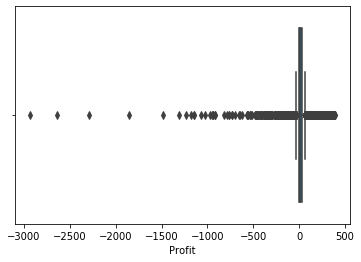

In [20]:
sns.boxplot(df['Profit'])

In [21]:
df.corr()

,Region,Sales,Quantity,Discount,Profit
Region,1.000000,0.025198,0.013467,-0.217108,0.075489
Sales,0.025198,1.000000,0.247304,-0.021700,0.109579
Quantity,0.013467,0.247304,1.000000,0.015845,0.052343
Discount,-0.217108,-0.021700,0.015845,1.000000,-0.371887
Profit,0.075489,0.109579,0.052343,-0.371887,1.000000


In [22]:
q1 = df['Discount'].quantile(0.25)
q3 = df['Discount'].quantile(0.75)
IQR = q3 - q1
print(IQR)


0.2


In [23]:

low_lim = q1 - 1.5 * IQR 
up_lim = q3 + 1.5 * IQR 
print('low_limit is:', low_lim) 
print('up_limit is:', up_lim) 

low_limit is: -0.30000000000000004
up_limit is: 0.5


In [24]:
df['Discount'].describe()

count    9770.000000
mean        0.157658
std         0.207341
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

## Exploratory Data Analysis :

In [25]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164


Text(0, 0.5, 'overall Sales')

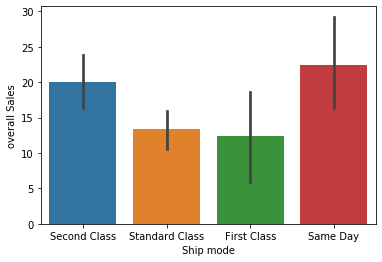

In [26]:
sns.barplot(x = df['Ship Mode'], y = df['Profit'])
plt.xlabel('Ship mode')
plt.ylabel('overall Sales')

Text(0.5, 1.0, 'Region vs Sales')

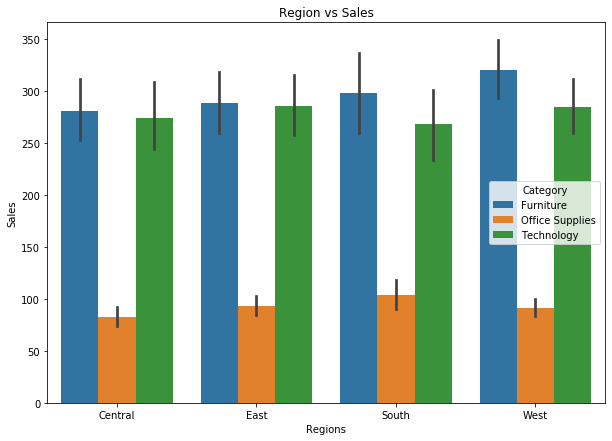

In [27]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['Region'], y = df['Sales'], hue = df['Category'])
plt.xticks([0,1, 2, 3], ['Central', 'East', 'South', 'West'])
plt.xlabel('Regions')
plt.ylabel('Sales')
plt.title('Region vs Sales')

1. Technology and Furniture Sales are high in South Region
2. Office supplies have registred lowest sale across all the regions


Text(0.5, 1.0, 'Region vs Profits')

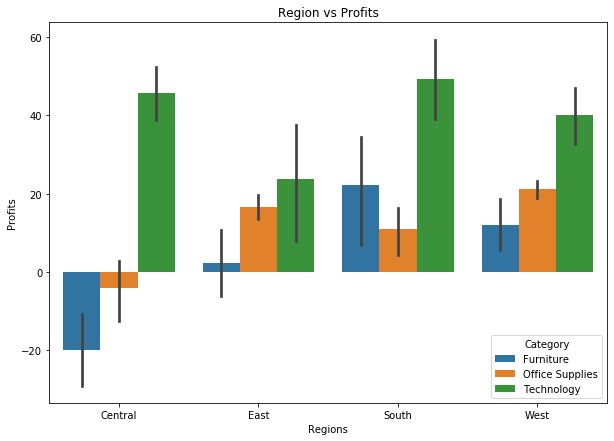

In [28]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['Region'], y = df['Profit'], hue = df['Category'])
plt.xticks([0,1, 2, 3], ['Central', 'East', 'South', 'West'])
plt.xlabel('Regions')
plt.ylabel('Profits')
plt.title('Region vs Profits')

1. As compared to other two categories, Technology enables highest profits
2. In Central, Furniture and office supplies are at loss.

In [29]:
## Grouping the data by region

In [30]:

regional_groups = df.groupby('Region')

In [31]:
central = regional_groups.get_group(0)
East = regional_groups.get_group(1)
south = regional_groups.get_group(2)
west = regional_groups.get_group(3)

Text(0.5, 1.0, 'Sales in Central Region')

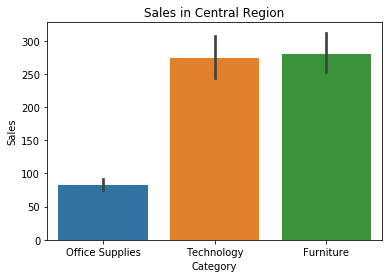

In [32]:
sns.barplot(x = central['Category'], y = central['Sales'])
plt.title("Sales in Central Region")

Text(0.5, 1.0, 'Profit of Categories in Central Region')

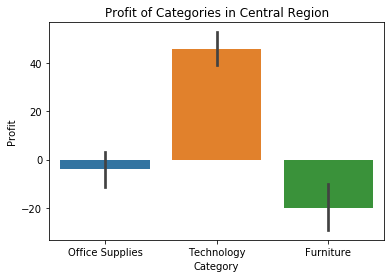

In [33]:
sns.barplot(x = central['Category'], y = central['Profit'])
plt.title("Profit of Categories in Central Region")

1. Important point: 

    1.1 In Central region Furniture has highest sale while its profits are in negative.
    
    1.2 This means, high investment is done on furniture which needs to be reduced and carry forward on technology category
    
    1.3 Same for Office supplies. This will increase the profitability from central region

Text(0.5, 1.0, 'Sate wise Sales in Central Region')

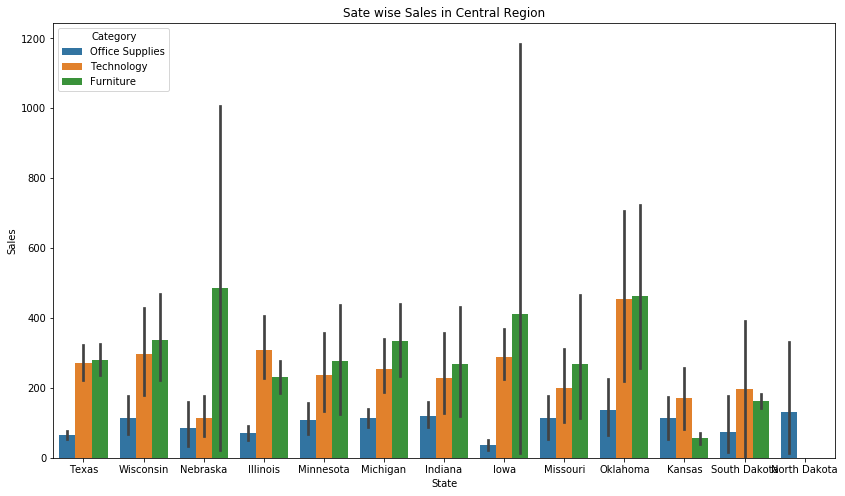

In [34]:
plt.figure(figsize = (14, 8))
sns.barplot(x = central['State'], y = central['Sales'], hue = central['Category'])
plt.title("Sate wise Sales in Central Region")

Text(0.5, 1.0, 'State wise Profit for categories in Central Region')

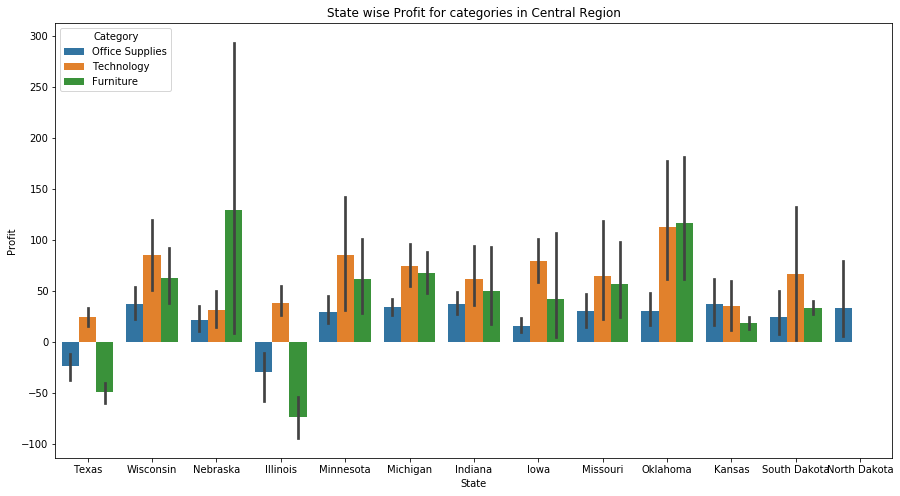

In [35]:
plt.figure(figsize = (15, 8))
sns.barplot(x = central['State'], y = central['Profit'], hue = central['Category'])
plt.title("State wise Profit for categories in Central Region")

Furniture & Office supplies sales in Illinois and Texas are high but reflect the Loss.
Thus, expenditure on these categories in Illinois and Texas should be reduced and expenditure should be increased on technology.

Text(0.5, 1.0, 'Sub-Categories vs Sales in CENTRAL region')

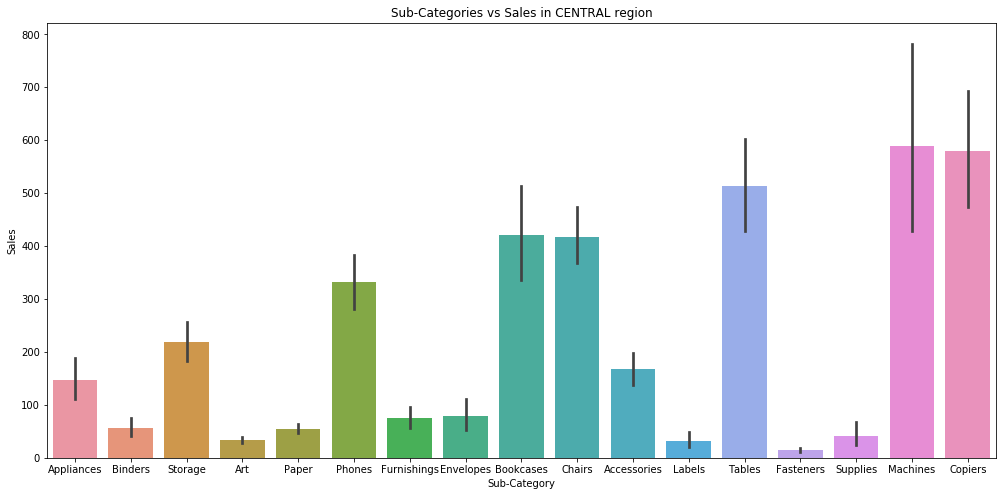

In [36]:
plt.figure(figsize = (17, 8))
sns.barplot(x = central['Sub-Category'], y = central['Sales'])
plt.title("Sub-Categories vs Sales in CENTRAL region")

Machine and Copiers had highest Sales while fastners had lowest

Text(0.5, 1.0, 'Sub-Categoreis vs Profits in CENTRAL region')

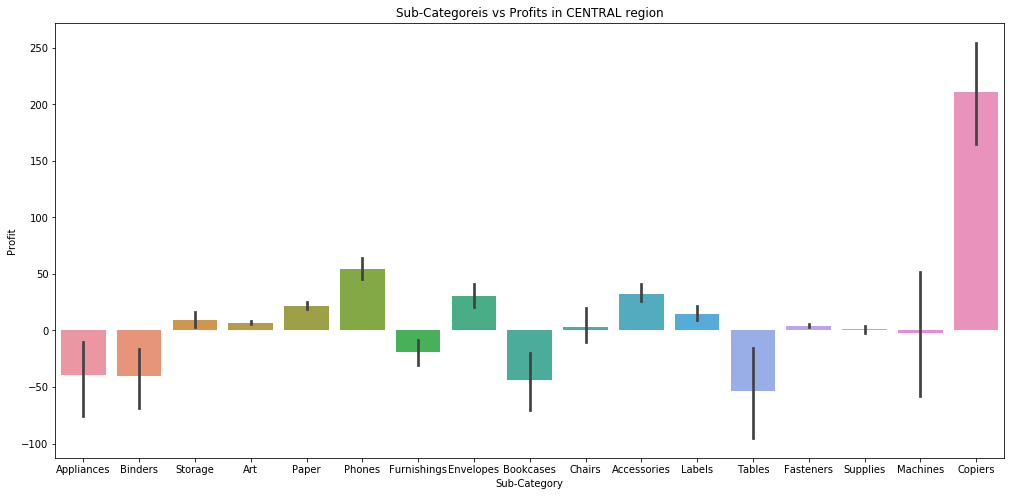

In [37]:
plt.figure(figsize = (17, 8))
sns.barplot(x = central['Sub-Category'], y = central['Profit'])
plt.title("Sub-Categoreis vs Profits in CENTRAL region")

Appliances, Binders, Bookcases and Tables have high sale but are in Loss
Thus, either prices for these accessories should be increased or sale shouuld be controlled in order to get profits from this.

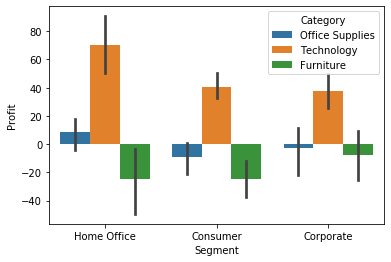

In [38]:
sns.barplot(x = central['Segment'], y = central['Profit'], hue = central['Category'])

Home Office segment shows highest loss in fuurniture as compared to others in central region. 
This also means, sale for furniture is high in home office segment which can be controlled by spending less on the category and reducing the disccount rate for this particular category.

In [39]:
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,3,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,3,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,3,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,3,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,3,Office Supplies,Appliances,114.9000,5,0.00,34.4700


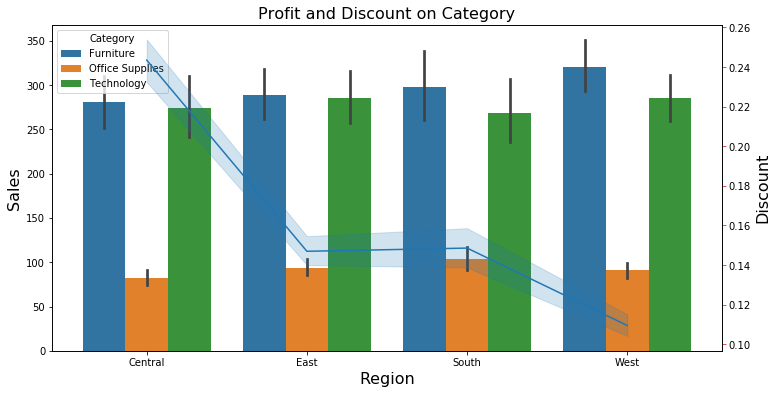

In [40]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(12,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Profit and Discount on Category', fontsize=16)
ax1.set_xlabel('Region', fontsize=16)
plt.xticks([0,1, 2, 3], ['Central', 'East', 'South', 'West'])
ax1.set_ylabel('Profit', fontsize=16)
ax1 = sns.barplot(x='Region', y='Sales', hue = 'Category', data = df)
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Discount', fontsize=16)
ax2 = sns.lineplot(x='Region', y='Discount', data = df)
plt.xticks([0,1, 2, 3], ['Central', 'East', 'South', 'West'])
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

As per the figure, a high discount is offered on office supplies and technology in central region. Prior to this, A high sale of furniture and office supplies was seen. The region suffers a loss beacause, on high sale high discount is given to these categories. Thus, discount on technology and office supplies should be minimized in this region.

([<matplotlib.axis.XTick at 0x2469b63eec8>,
 <a list of 4 Text xticklabel objects>)

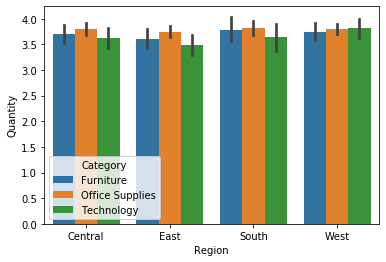

In [41]:
sns.barplot(x='Region', y='Quantity', hue = 'Category', data = df)
plt.xticks([0,1, 2, 3], ['Central', 'East', 'South', 'West'])

This shows office supplies have highest sale quantity and discount is also high which needs to be reduced 

In [42]:
city_groups = df.groupby('City')

In [43]:
city_groups['Profit'].mean().sort_values(ascending = False)

City
Independence    218.251800
Bellingham      185.342500
Burbank         174.272100
Saint Cloud     156.538000
Missoula        152.495000
                   ...    
Medina         -149.227178
Clarksville    -150.764743
Oswego         -178.709200
Champaign      -182.352000
Bethlehem      -200.619160
Name: Profit, Length: 531, dtype: float64

In [44]:
agg_sales = city_groups['Sales'].agg(np.sum).sort_values(ascending = False).reset_index()

In [45]:
agg_sales.head()

,City,Sales
0,New York City,157354.754
1,Los Angeles,130375.233
2,Philadelphia,88498.145
3,San Francisco,85504.970
4,Seattle,74793.346


In [46]:
central

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,0,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,0,Office Supplies,Binders,2.5440,3,0.80,-3.8160
16,Standard Class,Consumer,Madison,Wisconsin,0,Office Supplies,Storage,665.8800,6,0.00,13.3176
21,Standard Class,Corporate,Fremont,Nebraska,0,Office Supplies,Art,19.4600,7,0.00,5.0596
22,Standard Class,Corporate,Fremont,Nebraska,0,Office Supplies,Appliances,60.3400,7,0.00,15.6884
...,...,...,...,...,...,...,...,...,...,...,...
9961,First Class,Home Office,Houston,Texas,0,Office Supplies,Paper,65.5840,2,0.20,23.7742
9962,First Class,Home Office,Houston,Texas,0,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9972,Standard Class,Consumer,Houston,Texas,0,Office Supplies,Envelopes,99.5680,2,0.20,33.6042
9982,Standard Class,Consumer,Grand Rapids,Michigan,0,Office Supplies,Paper,35.5600,7,0.00,16.7132


Text(0.5, 1.0, 'Category wise discount in Central region')

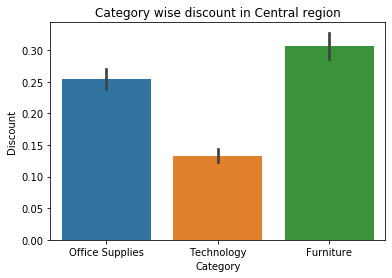

In [47]:
sns.barplot(x = 'Category', y = 'Discount', data = central)
plt.title('Category wise discount in Central region')

In [48]:
#some statistical analysis:

Text(0.5, 1.0, 'Category wise PROFIT in Central region')

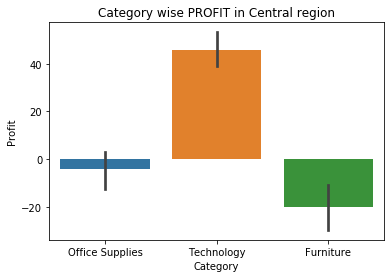

In [49]:
sns.barplot(x = 'Category', y = 'Profit', data = central)
plt.title('Category wise PROFIT in Central region')

In [50]:
categories_cent = central.groupby('Category')
cat_avg_sales = categories_cent['Category','Sales'].mean()


In [51]:
cat_avg_sales

,Sales
Category,
Furniture,280.712151
Office Supplies,82.596297
Technology,274.510713


In [52]:
cat_avg_discount = categories_cent['Category','Discount'].mean()

In [53]:
cat_avg_discount

,Discount
Category,
Furniture,0.306940
Office Supplies,0.254416
Technology,0.132673


In [54]:
cat_avg_profit = categories_cent['Category','Profit'].mean()

In [55]:
cat_avg_stats = cat_avg_discount.join(cat_avg_sales)

In [56]:
cat_avg_stats['Profit'] = cat_avg_profit

In [57]:
cat_avg_stats

,Discount,Sales,Profit
Category,,,
Furniture,0.306940,280.712151,-20.069954
Office Supplies,0.254416,82.596297,-4.052758
Technology,0.132673,274.510713,45.607843


Discount on Furnituure and Office supplies is surpassing the average discount rate which is 0.23 in central region while expenditure on these are also high. In this case, we can minimalize the dicount rate to reduce the loss and eventually this will increase the profit for these categories, in central region. 

In [58]:
#Analysis on East region 

In [59]:
East.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
23,Second Class,Consumer,Philadelphia,Pennsylvania,1,Furniture,Chairs,71.372,2,0.3,-1.0196
28,Standard Class,Consumer,Philadelphia,Pennsylvania,1,Office Supplies,Binders,9.618,2,0.7,-7.0532
29,Standard Class,Consumer,Philadelphia,Pennsylvania,1,Furniture,Furnishings,124.200,3,0.2,15.5250
30,Standard Class,Consumer,Philadelphia,Pennsylvania,1,Office Supplies,Envelopes,3.264,2,0.2,1.1016
31,Standard Class,Consumer,Philadelphia,Pennsylvania,1,Office Supplies,Art,86.304,6,0.2,9.7092


Text(0.5, 1.0, 'Sate vs Sales in EAST region')

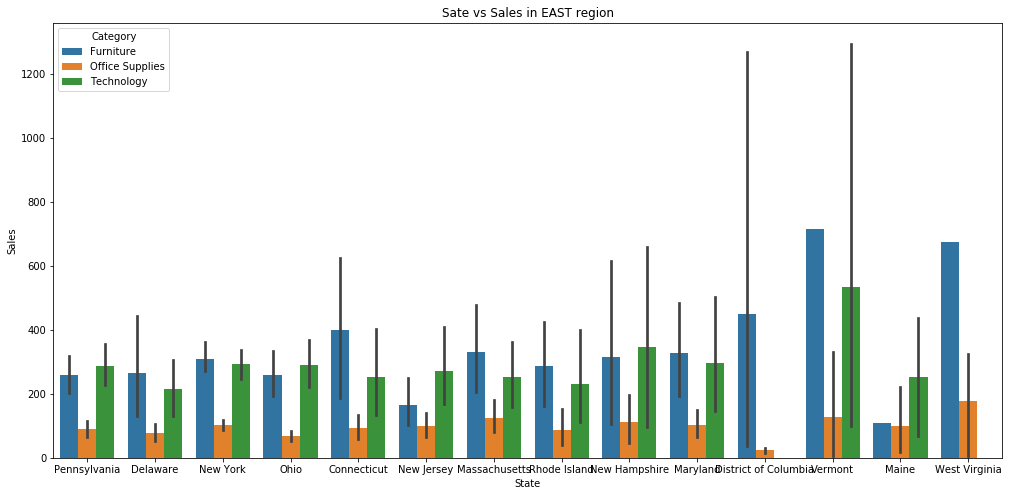

In [60]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Sales', data = East, hue = 'Category')
plt.title("Sate vs Sales in EAST region")

Text(0.5, 1.0, 'Sate vs Profits in EAST region')

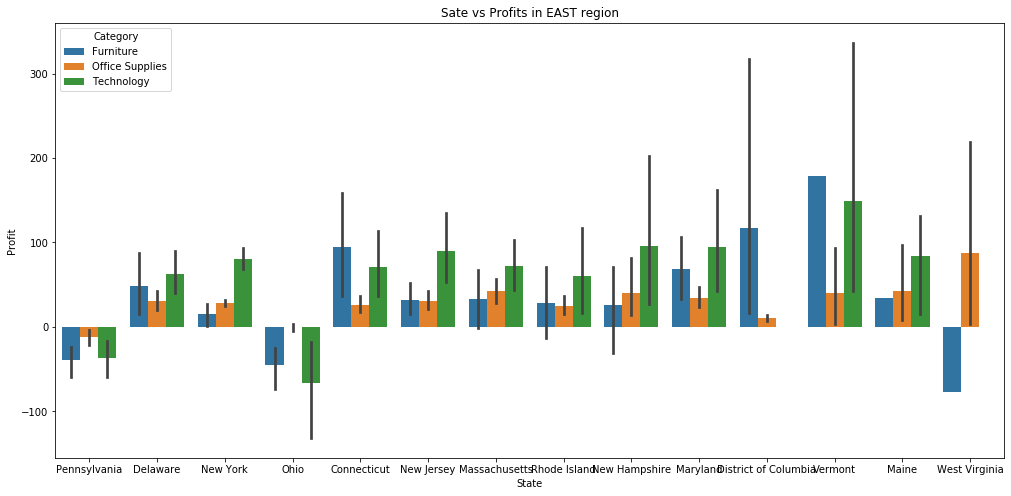

In [61]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Profit', data = East, hue = 'Category')
plt.title("Sate vs Profits in EAST region")

Text(0.5, 1.0, 'Sate vs discount in EAST region')

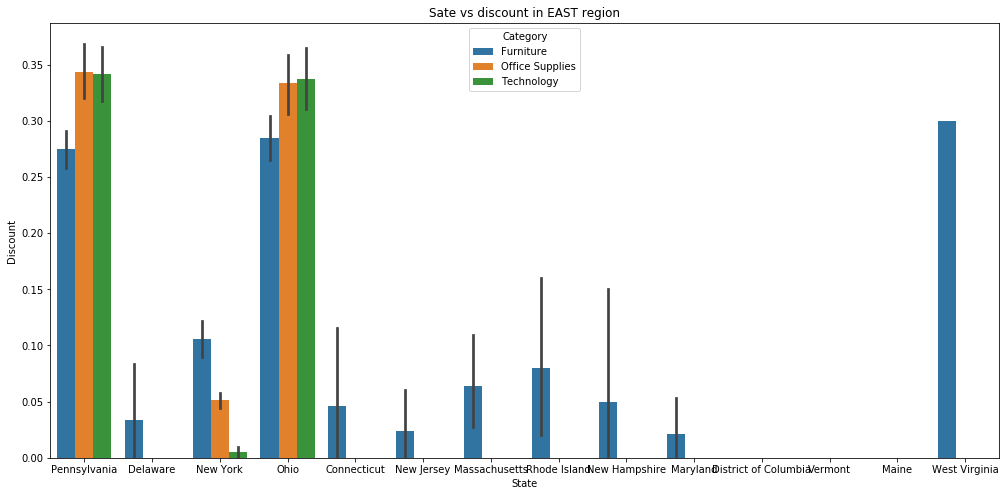

In [62]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Discount', data = East, hue = 'Category')
plt.title("Sate vs discount in EAST region")

In [63]:
categories_east = East.groupby('Category')
cat_avg_sales_east = categories_east['Category','Sales'].mean()
cat_avg_profit_east = categories_east['Category','Profit'].mean()
cat_avg_discount_east = categories_east['Category','Discount'].mean()


In [64]:
east_avg_stats = cat_avg_sales_east.join(cat_avg_profit_east)

In [65]:
east_avg_stats['Disocunt'] = cat_avg_discount_east

In [66]:
east_avg_stats

,Sales,Profit,Disocunt
Category,,,
Furniture,289.110165,2.294385,0.154082
Office Supplies,93.681763,16.652681,0.143846
Technology,285.481368,23.657454,0.149105


Text(0.5, 1.0, 'SUb-Categories vs Profit in EAST region')

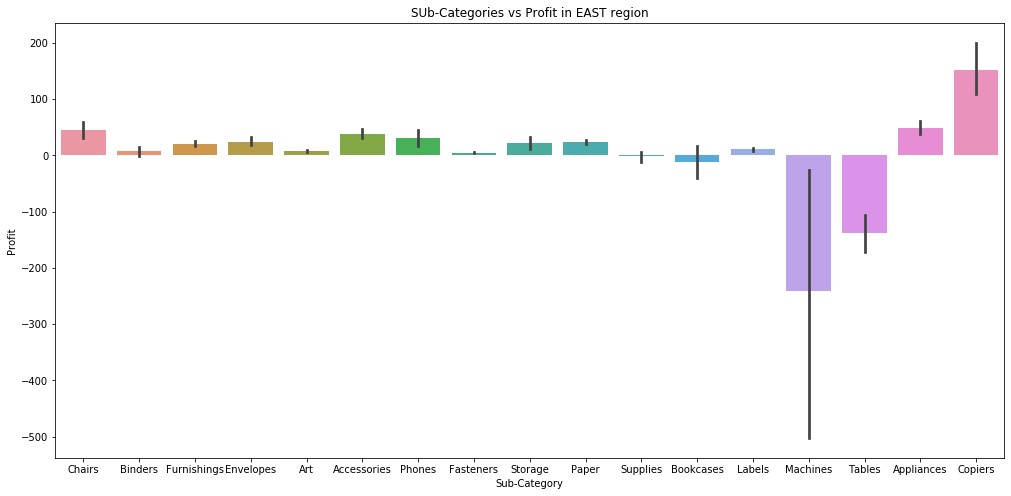

In [67]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'Sub-Category', y = 'Profit', data = East)
plt.title("SUb-Categories vs Profit in EAST region")

In [68]:
East[['City','Category','Sub-Category','Discount','Profit']][East['State']=='Ohio'].sort_values(by = 'Profit', ascending = False).head()

,City,Category,Sub-Category,Discount,Profit
1986,Columbus,Technology,Copiers,0.4,191.9968
9833,Springfield,Technology,Accessories,0.2,190.3881
7511,Columbus,Furniture,Furnishings,0.2,148.8450
1403,Columbus,Office Supplies,Paper,0.2,146.7900
4491,Columbus,Technology,Copiers,0.4,109.9980


This shows in Columnbus city, discount rate is more than average for copiers and technology category. Again, discount rate here should be reduced to improvise the profits

<Figure size 1224x576 with 0 Axes>

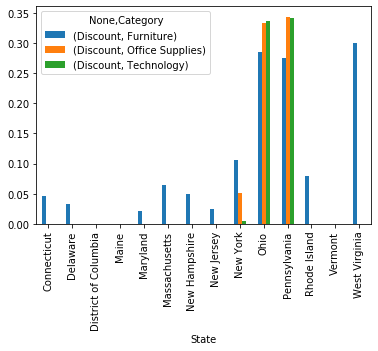

In [69]:
plt.figure(figsize=(17,8))
pivot_workclass = pd.pivot_table(East, values=['Discount'],
                                 index = 'State',
                                 columns = 'Category', aggfunc=np.mean, fill_value=0).plot.bar()

In Vermont, discount is negligible while sales are high thus, vermont gives highest profits in the Eastern Region. 
Discount rate should be reduced in Ohio and Pennsylvania for improving the profitability of the region.

In [70]:
# Analysis on South Region
south

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164
12,Standard Class,Consumer,Concord,North Carolina,2,Office Supplies,Paper,15.5520,3,0.20,5.4432
...,...,...,...,...,...,...,...,...,...,...,...
9971,Standard Class,Home Office,Smyrna,Georgia,2,Office Supplies,Art,140.7500,5,0.00,42.2250
9980,Second Class,Consumer,Lafayette,Louisiana,2,Furniture,Tables,85.9800,1,0.00,22.3548
9987,Standard Class,Corporate,Athens,Georgia,2,Technology,Accessories,79.9900,1,0.00,28.7964
9988,Standard Class,Corporate,Athens,Georgia,2,Technology,Phones,206.1000,5,0.00,55.6470


Text(0.5, 1.0, 'State vs Sales in SOUTH Region')

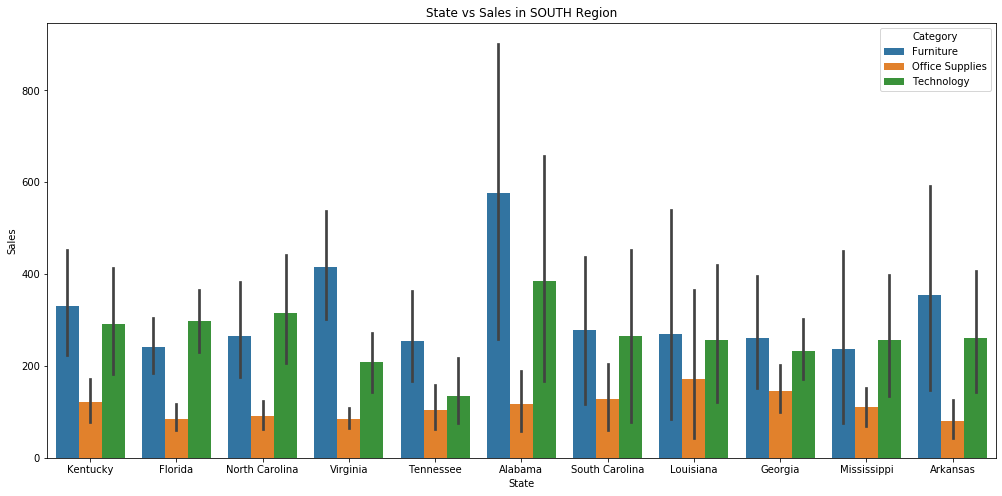

In [71]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Sales', hue = 'Category', data = south)
plt.title('State vs Sales in SOUTH Region')

Alabama state has highest sale of furniture and technology and Louisiana has highest sale of office supplies.

Text(0.5, 1.0, 'State vs Profit in SOUTH Region')

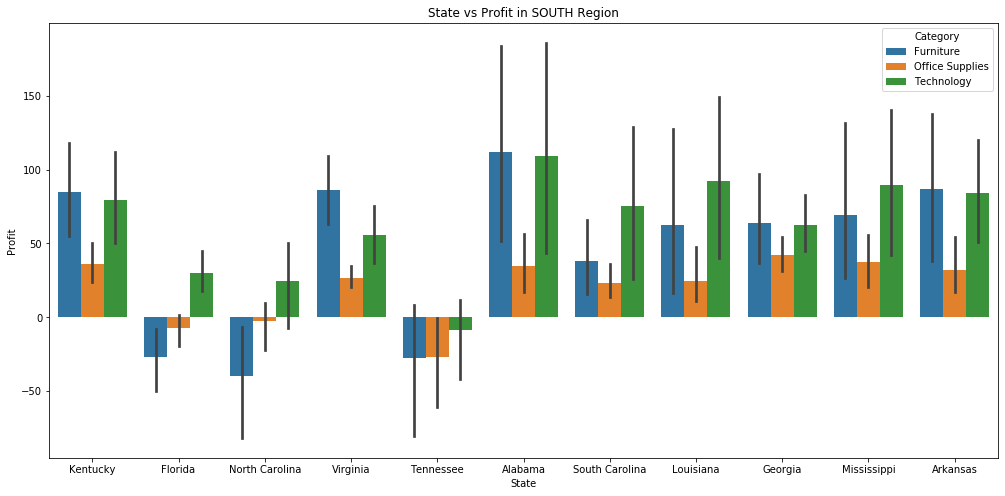

In [72]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Profit', hue = 'Category', data = south)
plt.title('State vs Profit in SOUTH Region')

Text(0.5, 1.0, 'State vs Discount in SOUTH Region')

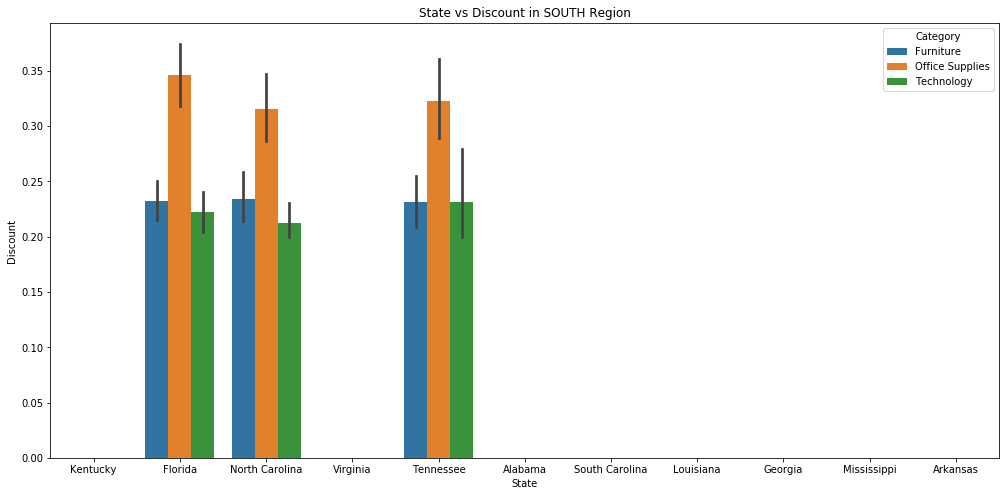

In [73]:
plt.figure(figsize = (17,8))
sns.barplot(x = 'State', y = 'Discount', hue = 'Category', data = south)
plt.title('State vs Discount in SOUTH Region')

Important Point: States of Tennessee, North Carolina and Florida have highest discount whereas, other states have none.
                 These are the only states which are showing extreme losses in all the categories.
                 Thus, dicount rate should be reduced to increase the profitability.

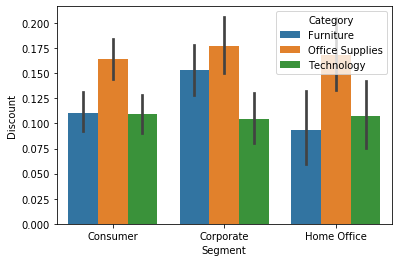

In [74]:
sns.barplot(x = 'Segment', y = 'Discount', data = south, hue = 'Category')

The discount rate is almost similar and high on office supplies in this region

## Conclusion:
The Loss in categories is majarly due to high discount given on office supplies and furniture categories. Also, in cenral region, expenses on these categories is way to high which if reduced can increase the profit margin. Besides, Technology category shouuld be given more attention in terms of sales and discount. A slight increase in discouunt for technology products can increase its sale thus would result in increased profitability. 